In [27]:
import numpy as np
import seaborn as sns; sns.set(font_scale=1.2)
# #Permite que aparezcan graficos en el Jupyrer Notebook
from matplotlib import pyplot as plt

from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler

In [2]:
def imagestoDF(direc):
    """
        Esta función obtiene imágenes del dataset en diferentes archivos
        de tipo NORMAL y PNEUMONIA
        En cada imagen se realiza un preprocesamiento y se convierte en dos listas
        Las listas contiene  todas las imagenes en matrices de 256x256
        
        Para cada imagen se agrega un target:
        0--> Normal
        1--> Pneumonia
        
        Se transforma las matrices de la lista a arrays de numpy
        Se transforma los arrays en uno solo con toda la información
        Cada imagen se transforma en un vector de una dimensión
        Se guardan todas las imagenes en este formato en un DF
        Se agrega los targets al final del DF
        
        Parametros:
        
        direc: Ubicación de los archivos train, test y val del dataset
    """
    # Con el path de las imagenes, se obtiene primero las normales
    pathN=Path(str(direc)+"/NORMAL/")
    print("Inicia el preprocesamiento imagenes Normales")
    # Se realiza el preprocesamiento
    imagesN = imagesPreproces(pathN)
    # Se convierte la lista de imagenes en un array de numpy
    imagenes_matN = np.array(imagesN)
    # Con el path de las imagenes, se obtiene luego las de Pneumonia
    pathP=Path(str(direc)+"/PNEUMONIA/")
    print("Inicia el preprocesamiento imagenes Pneumonia")
    # Se realiza el preprocesamiento
    imagesP = imagesPreproces(pathP)
    # Se convierte la lista de imagenes en un array de numpy
    imagenes_matP = np.array(imagesP)
    # Se obtienen dos arrays con las clasificaciones de las imagenes
    normales = np.zeros((imagenes_matN.shape[0], 1), int)
    pneumonia = np.ones((imagenes_matP.shape[0], 1), int)
    # Se une ambos arrays de imagenes
    imagenes_mat = np.concatenate((imagenes_matN,imagenes_matP),axis=0)
    # Se realiza un cambio de dimensiones en la matriz de imagenes
    # Se convierte lass matrices 256x256 de cada imagen a filas de 65536 elementos
    imagenes_mat1 = np.reshape(imagenes_mat, (imagenes_mat.shape[0], -1))
    # Se crea el dataFrame con los datos de las imagenes
    df = pd.DataFrame(data=imagenes_mat1)
    # Se juntas los arrays con los targets
    tg = np.concatenate((normales,pneumonia),axis=0)
    # se unen los targets al dataframe
    df['target'] = tg
    # Devuelve el dataframe
    return df
    

In [3]:
def imagesPreproces(direc):
    """
        Esta función hace el preprocesamiento de las imagenes
        Primero se obtiene la dirección de todas las imagenes
        Luego se las convierte a blanco y negro
        Se realiza un cambio en su tamaño y se las añade a una lista
        Al inicio la lista esta vacia
        Se devuelve la lista con todas las imagenes
        
        Parametros: 
        direc: path de donde se encuentran las imágenes
    """
    # Obtiene la dirección de todas las imagenes
    pathimgs=direc.glob("*.jpeg")
    # Lista de imagenes vacia
    images=[]
    # Itera en las imagenes
    for imagepath in pathimgs:
        # Obtiene una imagen
        img = io.imread(str(imagepath))
        # La convierte a blanco y negro
        img_g = rgb2gray(img)
        # Cambia el tamaño de la imagen a 256x256
        image_resized = resize(img_g, (256, 256), anti_aliasing=False)
        # Añade la imagen a la lista
        images.append(image_resized)
    
    # Imprime la dirección de la imagenes
    print("Imagenes preprocesadas de {}".format(str(direc)))
    # Imprime la cantidad de imagenes preprocesadas
    print("Imagenes preprocesadas: {}".format(len(images)))
    # Devuelve la lista de imagenes
    return images

In [4]:
# LLamamos imagenes de TRAIN
path=Path(r"C:\Users\Oney\Downloads\ProyectoSI-20220608T214001Z-001\ProyectoSI\DatasetRayosX\data\train")
dfImagenes = imagestoDF(path)
dfImagenes.head()

Inicia el preprocesamiento imagenes Normales


C:\Users\Oney\AppData\Local\Temp/ipykernel_16188/578929517.py:22: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img_g = rgb2gray(img)


Imagenes preprocesadas de C:\Users\Oney\Downloads\ProyectoSI-20220608T214001Z-001\ProyectoSI\DatasetRayosX\data\train\NORMAL
Imagenes preprocesadas: 999
Inicia el preprocesamiento imagenes Pneumonia
Imagenes preprocesadas de C:\Users\Oney\Downloads\ProyectoSI-20220608T214001Z-001\ProyectoSI\DatasetRayosX\data\train\PNEUMONIA
Imagenes preprocesadas: 999


,0,1,2,3,4,5,6,7,8,9,...,65527,65528,65529,65530,65531,65532,65533,65534,65535,target
0,0.090702,0.070588,0.071293,0.077963,0.062360,0.061673,0.139711,0.216192,0.224035,0.250780,...,0.428485,0.427878,0.443336,0.435152,0.435141,0.440610,0.444486,0.454305,0.442966,0
1,0.054902,0.094095,0.093673,0.120129,0.124510,0.133184,0.147626,0.144864,0.168068,0.187255,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.000000,0.000000,0.000000,0.000000,0.067907,0.084663,0.108287,0.125490,0.137240,0.169945,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002453,0.011806,0
3,0.155533,0.176318,0.180402,0.191628,0.215234,0.220634,0.232016,0.245918,0.262328,0.295910,...,0.040081,0.043528,0.041498,0.041085,0.047051,0.044623,0.043135,0.051049,0.043137,0
4,0.301786,0.291721,0.252267,0.236117,0.206081,0.179016,0.136014,0.109584,0.109480,0.098948,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


In [5]:
# Separa las variables de entrada de los target
X_train = dfImagenes.drop(columns=['target'])
y_train = dfImagenes['target']

In [7]:
# LLamamos a Imagenes de TEST
path=Path(r"C:\Users\Oney\Downloads\ProyectoSI-20220608T214001Z-001\ProyectoSI\DatasetRayosX\data\test")
dfImagenes_1 = imagestoDF(path)
dfImagenes_1.head()

Inicia el preprocesamiento imagenes Normales


C:\Users\Oney\AppData\Local\Temp/ipykernel_16188/578929517.py:22: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img_g = rgb2gray(img)


Imagenes preprocesadas de C:\Users\Oney\Downloads\ProyectoSI-20220608T214001Z-001\ProyectoSI\DatasetRayosX\data\test\NORMAL
Imagenes preprocesadas: 234
Inicia el preprocesamiento imagenes Pneumonia
Imagenes preprocesadas de C:\Users\Oney\Downloads\ProyectoSI-20220608T214001Z-001\ProyectoSI\DatasetRayosX\data\test\PNEUMONIA
Imagenes preprocesadas: 390


,0,1,2,3,4,5,6,7,8,9,...,65527,65528,65529,65530,65531,65532,65533,65534,65535,target
0,0.122350,0.122135,0.124161,0.129160,0.128326,0.113085,0.116935,0.120937,0.113964,0.117480,...,0.126677,0.129036,0.127949,0.127969,0.128650,0.136098,0.124820,0.132123,0.133086,0
1,0.100176,0.149150,0.120181,0.104498,0.112875,0.082035,0.220389,0.295424,0.319554,0.355115,...,0.127650,0.130018,0.127442,0.128933,0.131640,0.123989,0.131579,0.122212,0.120090,0
2,0.157989,0.147894,0.146178,0.150321,0.150223,0.134390,0.115128,0.131963,0.125490,0.147993,...,0.107652,0.129771,0.133065,0.137025,0.145373,0.135156,0.145711,0.130538,0.134643,0
3,0.281163,0.278431,0.293973,0.286627,0.301100,0.298583,0.301608,0.306509,0.356510,0.355610,...,0.466745,0.416318,0.513215,0.509130,0.507869,0.542520,0.553454,0.477036,0.508847,0
4,0.164936,0.162251,0.152941,0.154885,0.154557,0.139438,0.152941,0.154257,0.141176,0.138625,...,0.160394,0.152390,0.163317,0.168827,0.173437,0.179372,0.174029,0.181641,0.179896,0


In [8]:
X_test = dfImagenes_1.drop(columns=['target'])
y_test = dfImagenes_1['target']

In [9]:
# Datos para la validación
path=Path(r"C:\Users\Oney\Downloads\ProyectoSI-20220608T214001Z-001\ProyectoSI\DatasetRayosX\data\val")
dfVal = imagestoDF(path)
dfVal.head()

Inicia el preprocesamiento imagenes Normales
Imagenes preprocesadas de C:\Users\Oney\Downloads\ProyectoSI-20220608T214001Z-001\ProyectoSI\DatasetRayosX\data\val\NORMAL
Imagenes preprocesadas: 8
Inicia el preprocesamiento imagenes Pneumonia


C:\Users\Oney\AppData\Local\Temp/ipykernel_16188/578929517.py:22: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img_g = rgb2gray(img)


Imagenes preprocesadas de C:\Users\Oney\Downloads\ProyectoSI-20220608T214001Z-001\ProyectoSI\DatasetRayosX\data\val\PNEUMONIA
Imagenes preprocesadas: 8


,0,1,2,3,4,5,6,7,8,9,...,65527,65528,65529,65530,65531,65532,65533,65534,65535,target
0,0.726051,0.013285,0.043643,0.067122,0.094056,0.112377,0.137990,0.164641,0.201532,0.223876,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.634475,0.014407,0.442019,0.451103,0.296856,0.283257,0.241305,0.147913,0.029843,0.011091,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0.683387,0.007811,0.290590,0.324872,0.380008,0.367714,0.400644,0.415680,0.422222,0.196676,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
3,0.341785,0.013840,0.687672,0.340832,0.236037,0.195711,0.136477,0.114560,0.111926,0.126697,...,0.000000,0.052466,0.005668,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0.078092,0.009182,0.213637,0.073344,0.061684,0.066667,0.054963,0.056018,0.112058,0.147120,...,0.132108,0.183490,0.145035,0.191738,0.139338,0.123033,0.125172,0.108065,0.106706,0


In [10]:
# Separando los datos y etiquetas de validacion
X_val = dfVal.drop(columns=['target'])
y_val = dfVal['target']

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [12]:
#Creamos el modelo con 3 capas de 32, 8 y 2 neuronas, luego entrenamos
model1 = MLPClassifier(hidden_layer_sizes=(128,32,8,4,2), activation='logistic', random_state = 0, learning_rate_init = 0.0005, learning_rate='adaptive',max_iter=250)

In [13]:
model1.fit(X_train,y_train)

C:\Users\Oney\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(128, 32, 8, 4, 2),
              learning_rate='adaptive', learning_rate_init=0.0005, max_iter=250,
              random_state=0)

In [15]:
#Hacemos la prediccion de los valores de prueba
y_pred= model1.predict(X_test)
print(model1.n_iter_)

250


In [16]:
# Puntaje de precisión de los datos de prueba
acc_test = accuracy_score(y_test,y_pred)*100
print("Precisión: {0:.2f}%".format(acc_test))

Precisión: 80.45%


In [17]:
print(model1.score(X_train,y_train))

0.987987987987988


In [18]:
# Matriz de confusión de datos de prueba
cm = confusion_matrix(y_test, y_pred)
categorias = ['Normal','Neumonia']
df_cm = pd.DataFrame(cm,index=categorias,columns=categorias)
df_cm.head()

,Normal,Neumonia
Normal,118,116
Neumonia,6,384


<AxesSubplot:>

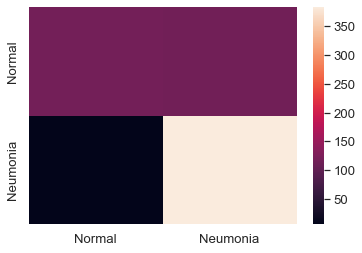

In [19]:
# Grafica de calor de la matriz de confusión
sns.heatmap(df_cm, annot=False)

In [20]:
# Otros puntajes de la clasificación
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.50      0.66       234
           1       0.77      0.98      0.86       390

    accuracy                           0.80       624
   macro avg       0.86      0.74      0.76       624
weighted avg       0.84      0.80      0.79       624



In [21]:
# Predicción de los datos de validacion
val= model1.predict(X_val)
# Matriz de confusión de datos de validación
cm_val = confusion_matrix(y_val, val)
df_cm_val = pd.DataFrame(cm_val,index=categorias,columns=categorias)
df_cm_val.head()

,Normal,Neumonia
Normal,7,1
Neumonia,0,8


<AxesSubplot:>

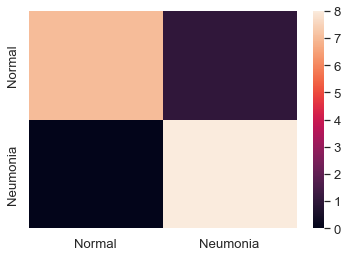

In [22]:
# Grafica de calor de la matriz de confusión
sns.heatmap(df_cm_val, annot=False)

In [23]:
# Puntaje de precisión de los datos de validadción
acc_val = accuracy_score(y_val,val)*100
print("Precisión Validación: {0:.2f}%".format(acc_val))

Precisión Validación: 93.75%


In [24]:
# Otros puntajes de la clasificación
print(classification_report(y_val,val))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       0.89      1.00      0.94         8

    accuracy                           0.94        16
   macro avg       0.94      0.94      0.94        16
weighted avg       0.94      0.94      0.94        16



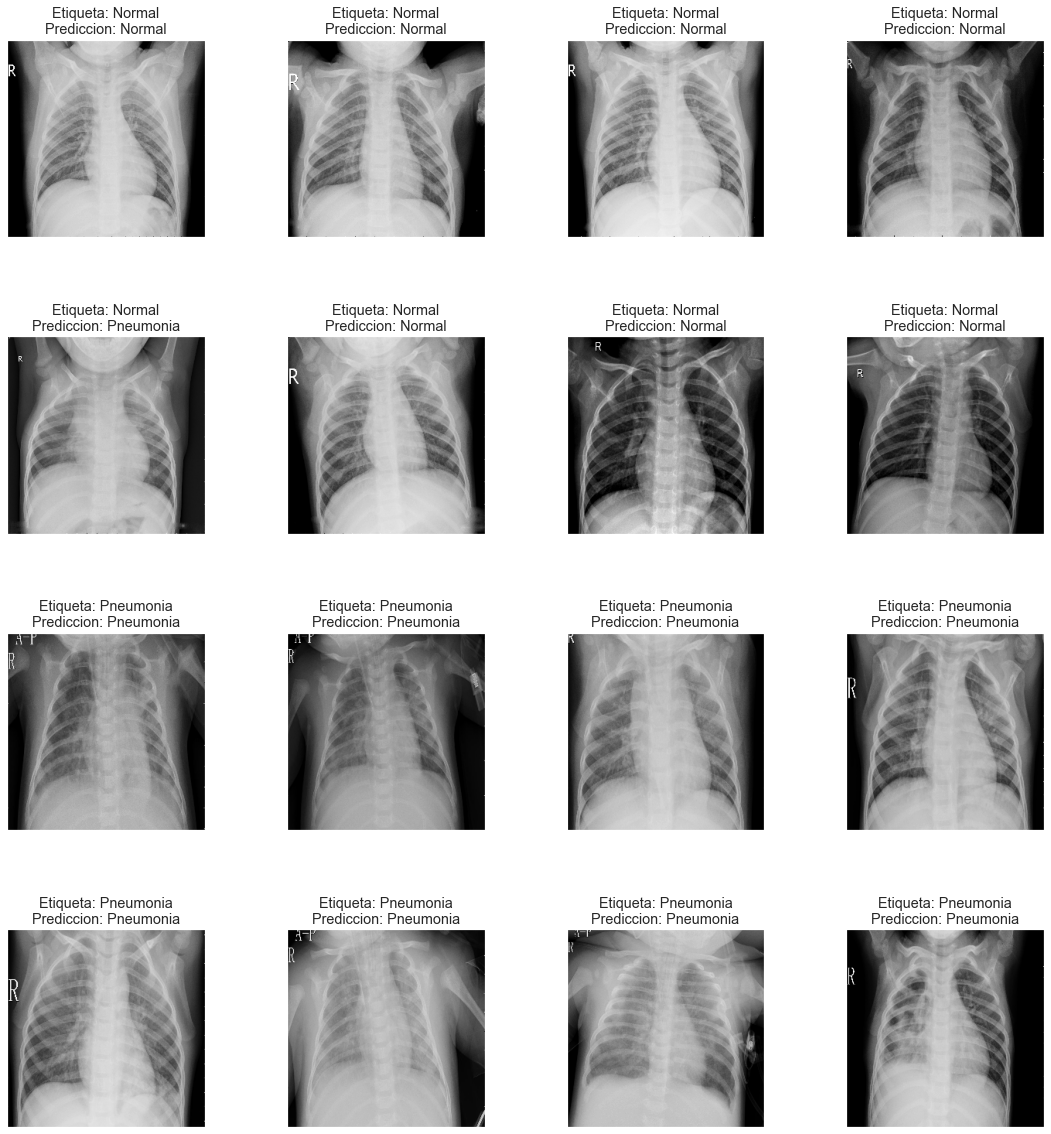

In [28]:
# Subplot de las imagenes de validación
fig, axes = plt.subplots(4,4,figsize=(20,20),
                        subplot_kw = {'xticks': [],'yticks':[]},
                        gridspec_kw = dict(hspace = 0.5,wspace = 0.01))
for i,ax in enumerate(axes.flat):
    # Convierte la imagen en un array y cambia su tamaño para mostrarla
    imagenp = np.array(X_val.iloc[i].values)
    imagenp = np.reshape(imagenp,(256,256))
    # Muestra la imagen
    ax.imshow(imagenp, cmap=plt.cm.gray)
    # Obtiene la categoria real y la predicción
    tipo = y_val.iloc[i]
    if(tipo == 0):
        tipostr="Normal"
    else:
        tipostr="Pneumonia"
    
    if(val[i] == 0):
        predstr="Normal"
    else:
        predstr="Pneumonia"
    # Muestra en el título la etiqueta real y la predicción
    ax.set_title("Etiqueta: {}\nPrediccion: {}".format(tipostr,predstr))